# PERSONAL LOAN PREDICTION

Introduction

Data Set

Project Overview

Project Motivation

Gatgering Data

Exploratory Data Analysis

ModellingConclusion

# INTRODUCTION

In this project we are going to predict which customer will take personal loan. 
we will use classification algorithms to differentiate people with buy loan vs the who will
not

# DATA SET

The files contains data of 5000 customers.The data include customer demographic
information(age , income etc.) , customer relationship with bank and customers response on
campaign on personal loan.


# PROJECT OBJECTIVE

Client is interested in understanding the leading indicator for interested customers for personal
loan.This will enable them to take pre-emptive action such offering better plans to encouraging
them to take personal loan.


In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print('Libraries imported')

Libraries imported


# Gathering Data

In [2]:
bank_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df = bank_df.copy()

In [3]:
print('Shape of data{}'.format(df.shape))
print("Number of rows:{}".format(df.shape[0]))
print("Number of columns:{}".format(df.shape[1]))

Shape of data(5000, 14)
Number of rows:5000
Number of columns:14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# Observation : 
There are 13 features and 5000 entires, all non-null. all features are numerical
features, and of them, Education , Mortagage , Securities Account ,CD Account ,
Online ,Credit Card , Personal Loan is a numerical categorical feature.

# Missings and Duplicate Values

In [5]:
print(df.isna().sum().sort_values(ascending = False))
print('duplicate values in df are' ,df.duplicated().sum() )
print('duplicates dropped')

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64
duplicate values in df are 0
duplicates dropped


Missing Data - Here we don't have any missing data:

1 . For features with less missing values we can use regression to predict the missing values or fill
    with the mean of the values present, depending on the feature.

2 . For features with very high number of missing values- it is better to drop those columns as
    they give very less insight on analysis. As there's no thumb rule on what criteria do we delete
    the columns with high number of missing values, but generally we can delete the columns, if
    we have more than 30-40% of missing value

In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

# Dropping Unnecessary columns 'ID' and 'ZIP Code'

In [8]:
df.drop(columns = ['ID' , 'ZIP Code'] , axis = 1 , inplace =True)

# Target Varaible is :Personal Loan

In [9]:
#create counts of df for plotting categorical variables
loan = np.unique(df['Personal Loan'], return_counts=True)
print('loan = {}\n'.format(loan))

loan = (array([0, 1], dtype=int64), array([4520,  480], dtype=int64))



In [10]:
# create fontdicts for formatting figure text
title_dict={'family':'serif','color':'red','weight':'bold','size':16}
lab_dict={'family':'serif','color':'black','size':14}

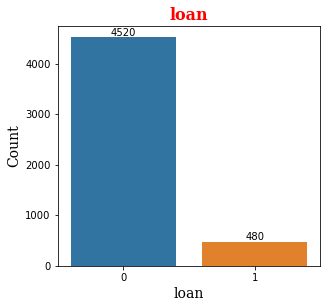

In [11]:
# display a frequency distribution for personal loan
fig=plt.figure(figsize=(16,15))
axis=fig.add_subplot(3,3,2)
sns.barplot(x=list(loan[0]),y=list(loan[1]))
axis.set_title('loan',fontdict=title_dict)
axis.set_xlabel('loan',fontdict=lab_dict)
axis.set_ylabel('Count',fontdict=lab_dict)
axis.bar_label(axis.containers[0])
plt.show()

Data is Highly Imblanaced.majority of the data are class 0.Imblanaced ratio is 90:10.out of 5000 data 4520 is for not opting personal loan and 480 is for personal loan.

Filtering Numericals and Categoricals columns:

In [12]:
categ_columns = []
for col in df.columns:
    if df[col].nunique()<=5:
        if col!='Personal Loan':
            categ_columns.append(col) 
print('categ numericals columns are {}'.format(categ_columns))

categ numericals columns are ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [13]:
Num_cols = [col for col in df.columns if col not in categ_columns]
print('numericals columns are {}'.format(Num_cols)) 
Num_cols.pop() #Removing Personal Loan
Num_cols

numericals columns are ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan']


['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

# EDA

In [14]:
#create counts of df for plotting categorical variables
Online_account = np.unique(df['Online'], return_counts=True)
print('Online_account = {}\n'.format(Online_account))

Online_account = (array([0, 1], dtype=int64), array([2016, 2984], dtype=int64))



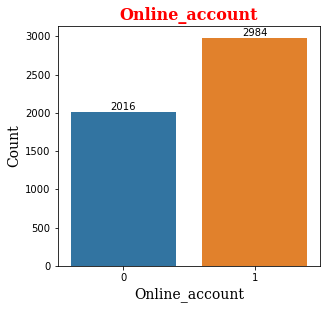

In [15]:
fig=plt.figure(figsize=(16,15))
ax1=fig.add_subplot(3,3,2)
sns.barplot(x=list(Online_account[0]),y=list(Online_account[1]))
ax1.set_title('Online_account',fontdict=title_dict)
ax1.set_xlabel('Online_account',fontdict=lab_dict)
ax1.set_ylabel('Count',fontdict=lab_dict)
ax1.bar_label(ax1.containers[0])
plt.show()

In [16]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue'];

In [17]:
# Check of outliers by applying the IQR method checking if values are way outside
# numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
df_num = df[Num_cols]
df_num.describe()
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

Age           False
Experience    False
Income         True
CCAvg          True
Mortgage       True
dtype: bool

Income , CCAvg , Mortgage have outliers

<AxesSubplot:xlabel='Age'>

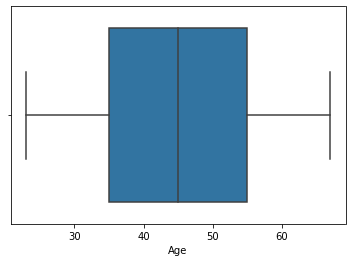

In [18]:
sns.boxplot(data=df,x=df['Age'])

# Visualization of outliers using box plot

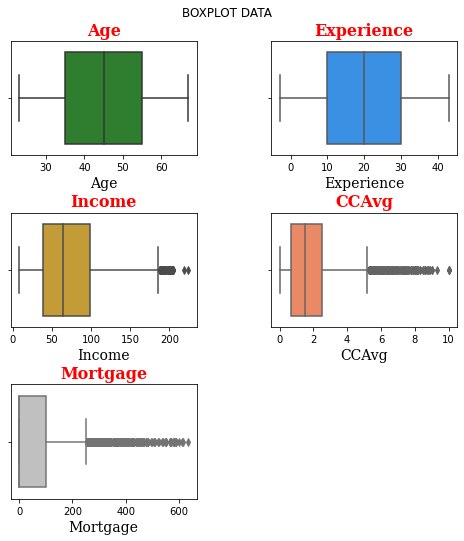

In [19]:
fig = plt.figure(figsize=[8,8])
fig.suptitle('BOXPLOT DATA', fontsize=12)
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

for i ,col in enumerate(Num_cols):  
    ax1 = fig.add_subplot(3, 2, i+1)
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i])
 
    ax1.set_title(f'{col}', fontdict=title_dict) 
    ax1.set_xlabel(f'{col}', fontdict=lab_dict)

# Outliers Detection

In [20]:
# Finding the IQR For Budget columns
dict = {}
for col in ['Income' , 'CCAvg' , 'Mortgage']:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * IQR 
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit 

In Above code cell i just created a dictionary to keep upper_limit and lower_limit of Income,CCAvg , Mortgage.

In [21]:
dict

{'upper_limit_Income': 186.5,
 'lower_limit_Income': -49.5,
 'upper_limit_CCAvg': 5.2,
 'lower_limit_CCAvg': -2.0,
 'upper_limit_Mortgage': 252.5,
 'lower_limit_Mortgage': -151.5}

In [22]:
for col in ['Income' , 'CCAvg' , 'Mortgage']:
    df[col] = np.where(df[col] > dict['upper_limit_' + col],dict['upper_limit_' + col],np.where(df[col] < dict['lower_limit_' + col],dict['lower_limit_' + col],
            df[col]))

In [23]:
for col in ['Income' , 'CCAvg' , 'Mortgage']:
    print('There are total {} Customers data which {} are less than lower limit.'.format(len(df[df[col] < dict['lower_limit_' + col]] ) , col))
    print('There are total {} Customers data which {} are more than upper limit.'.format(len(df[df[col] > dict['upper_limit_' + col]] ) , col))

There are total 0 Customers data which Income are less than lower limit.
There are total 0 Customers data which Income are more than upper limit.
There are total 0 Customers data which CCAvg are less than lower limit.
There are total 0 Customers data which CCAvg are more than upper limit.
There are total 0 Customers data which Mortgage are less than lower limit.
There are total 0 Customers data which Mortgage are more than upper limit.


Capping Income , CCAvg and Mortgage with upper limit and lower limit.

# After Outliers treatment

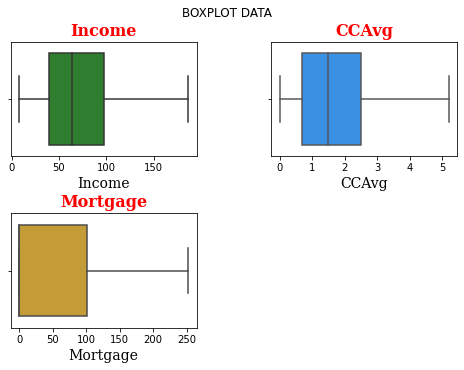

In [24]:
fig = plt.figure(figsize=[8,8])
fig.suptitle('BOXPLOT DATA', fontsize=12)
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

for i ,col in enumerate(['Income' , 'CCAvg' , 'Mortgage']):  
    ax1 = fig.add_subplot(3, 2, i+1)
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i])
 
    ax1.set_title(f'{col}', fontdict=title_dict) 
    ax1.set_xlabel(f'{col}', fontdict=lab_dict)

# Bivariate analysis

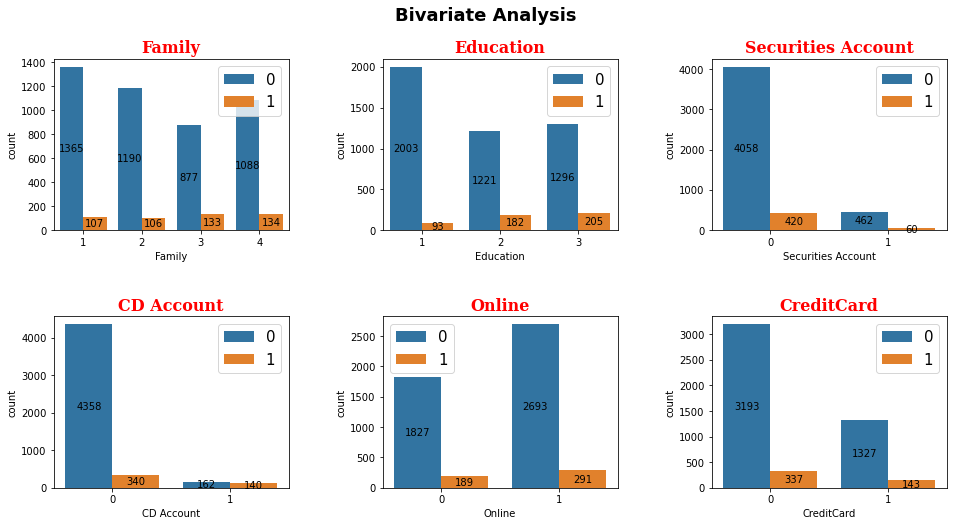

In [25]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(categ_columns):
    a = fig.add_subplot(3, 3, i+1)
    a=sns.countplot(x = df[col] , ax=a , hue = df['Personal Loan'] )
    a.set_title(col , fontdict=title_dict)
    a.bar_label(a.containers[0] , label_type='center') 
    a.bar_label(a.containers[1] , label_type='center')
    a.legend(fontsize=15)

Plot Insights:

Highly educated customers seem to much interested in personal loan than lower educated customers.

Customers without securites account seem to more interseted than not securities account customers in personal loan.

Customers with CD Account have higher probablity to take personal loan.in bar graph you can clearly see out of 163 cd account customers 140 is taken personal loan.

Customers with Online internet banking are more intersted than non online customers in personal loan.

Customers without Credit Card have much higher chance to take personal loan.

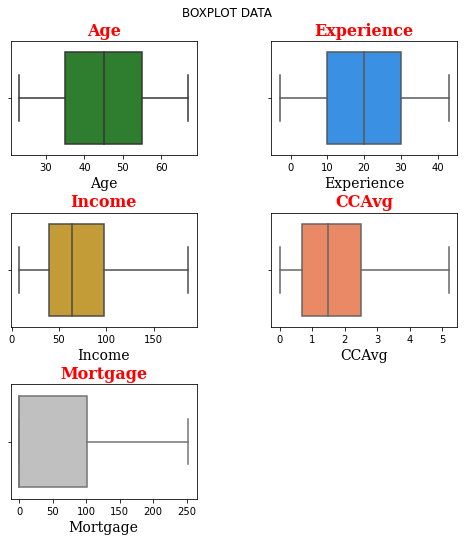

In [26]:
fig = plt.figure(figsize=[8,8])
fig.suptitle('BOXPLOT DATA', fontsize=12)
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

for i ,col in enumerate(Num_cols):  
    ax1 = fig.add_subplot(3, 2, i+1)
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i])
 
    ax1.set_title(f'{col}', fontdict=title_dict) 
    ax1.set_xlabel(f'{col}', fontdict=lab_dict)

Plot Insights:

Customers with personal loan Have Much higher Income with a median of 145 compared
to a median of customers not opting for personal loan of median 55.

Customers who opted for personal loan have higher credit card avg spending with median 4.

Customers who opted for personal loan have slightly higher mortgate.
Age and Experience doesn't have much effect on personal loan.

# Creating Dummies for Categ columns

In [27]:
dum_df = pd.get_dummies(df , columns = categ_columns)
dum_df.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Family_1,Family_2,Family_3,Family_4,...,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,25,1,49.0,1.6,0.0,0,0,0,0,1,...,0,0,0,1,1,0,1,0,1,0
1,45,19,34.0,1.5,0.0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,39,15,11.0,1.0,0.0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,35,9,100.0,2.7,0.0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,35,8,45.0,1.0,0.0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1


# Modelling

In [28]:
X = dum_df.drop('Personal Loan' , 1 )
y = dum_df['Personal Loan']

In [29]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y  ,test_size = 0.33 , random_state = 42)

In [30]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape 

((3350, 20), (3350,), (1650, 20), (1650,))

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import recall_score , classification_report , confusion_matrix  ,roc_curve , roc_auc_score , accuracy_score
from sklearn.metrics import precision_recall_curve , auc ,f1_score , plot_confusion_matrix , precision_score , recall_score
from sklearn.tree import DecisionTreeClassifier

In [32]:
def confusion_matrix_plot(X_test , y_test , classifier ,classifier_name):
    ax = plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Personal Loan", "Personal Loan"], cmap=plt.cm.Blues, normalize='true')

# Logistic Regression

In [49]:
lr= LogisticRegression(random_state=0)  

lr.fit(X_train, y_train) 

LogisticRegression(random_state=0)

In [50]:
y_pred = lr.predict(X_test)
lr.score(X_test , y_test)

0.9660606060606061

In [51]:
confusion_matrix(y_test,y_pred)

array([[1468,   12],
       [  44,  126]], dtype=int64)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1480
           1       0.91      0.74      0.82       170

    accuracy                           0.97      1650
   macro avg       0.94      0.87      0.90      1650
weighted avg       0.96      0.97      0.96      1650



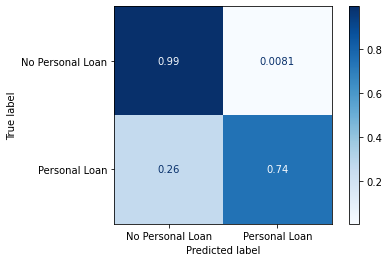

In [52]:
print(classification_report(y_test,y_pred))
confusion_matrix_plot(X_test , y_test , lr , "Logistic Regression")

# KNN Classifier

In [37]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test , y_test)

0.8927272727272727

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1480
           1       0.46      0.21      0.29       170

    accuracy                           0.89      1650
   macro avg       0.69      0.59      0.62      1650
weighted avg       0.87      0.89      0.87      1650



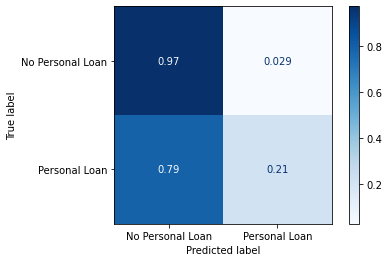

In [38]:
print(classification_report(y_test,y_pred))
confusion_matrix_plot(X_test , y_test , knn , "Knn Classifier")

# Random Forest Classifier

In [39]:
Rf = RandomForestClassifier()
Rf.fit(X_train, y_train)
y_pred = Rf.predict(X_test)
Rf.score(X_test , y_test) 

0.990909090909091

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1480
           1       0.99      0.92      0.95       170

    accuracy                           0.99      1650
   macro avg       0.99      0.96      0.97      1650
weighted avg       0.99      0.99      0.99      1650



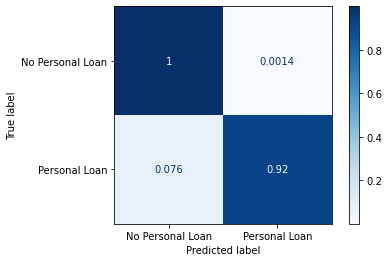

In [40]:
print(classification_report(y_test,y_pred))
confusion_matrix_plot(X_test , y_test , Rf , "Random Forest Classifier")

# Support Vector Machine

In [41]:
svm = SVC(kernel='rbf', probability=True) 
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
svm.score(X_test , y_test) 

0.9

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1480
           1       0.57      0.12      0.20       170

    accuracy                           0.90      1650
   macro avg       0.74      0.56      0.57      1650
weighted avg       0.87      0.90      0.87      1650



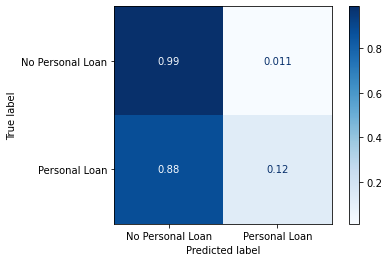

In [42]:
print(classification_report(y_test,y_pred))
confusion_matrix_plot(X_test , y_test , svm , "Support Vector Machine")

# DecisionTreeClassifier

In [43]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
dtc.score(X_test , y_test) 

0.983030303030303

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1480
           1       0.92      0.91      0.92       170

    accuracy                           0.98      1650
   macro avg       0.96      0.95      0.95      1650
weighted avg       0.98      0.98      0.98      1650



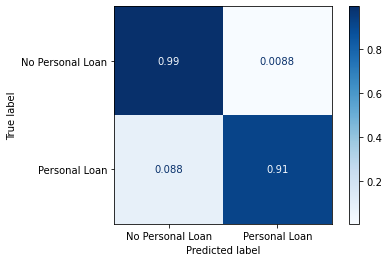

In [44]:
print(classification_report(y_test,y_pred))
confusion_matrix_plot(X_test , y_test , dtc , "Decision Tree Classifier")

# Conclusion:

Here we can say that the bank should give more attractive offers to their customer base and there is no churn happening 
or the sales happening and customers going to other banks they stay banking with us and when even they require any Loan
they approach to us at the first instance